# MiniLab SVM and Logistic Regression
#### Yang Zhang, Reannan McDaniel, Jonathon Roach, Fred Poon
##### 06/14/2020
##### Machine Learning 1 | MSDS_7331

## Business Understanding
For this analysis, our group will be working with North Carolina Public Schools Report Card and Statistical Profiles Data sets from the years 2014 to 2017. These data sets encompass information across 4 continuous years of educational attributes in North Carolina, USA.  The data is collected from the State of North Carolina at [http://ncpublicschools.org](http://ncpublicschools.org) and made available from the Belk Endowment Educational Attainment Data Repository for North Carolina Public Schools by Dr. Jake Drew. Among other reasons, the data was collected for evaluation of public-school performance for the purpose of efficiently allocating funds to various educational initiatives. Analyses of such data are important because high-impact educational initiatives that are well-funded contribute to increased graduation rates, increased achievement at the post-secondary level, less crime, and greater economic engagement among young people. For the purpose of this exercise, our focus is on describing and predicting school performance using various school characteristics, such as type of school (elementary, middle, high, or some combination of the three), social demographics, economic demographics, and location between 2014 and 2017. The Belk Foundation's website says, "Our goal is to empower today’s workforce by creating pathways to and through postsecondary education for underrepresented students". 

<!-- For the sake of this analysis, we assume that better performing schools have better outcomes in postsecondary education. With North Carolina's rapidly changing demographics, it is important to take into consideration schools' unique needs when allocating funds to strategic investment initiatives. Here, we explore where funding can be best applied based on educational achievement data.-->

We will explore through visual and mathematical modeling which features best predict the School Performance Grade (SPG Grade), a letter grade classification based on test scores and growth measures. The analysis will come in the form of logistic regression model and support vector machine(SVM) model to classify SPG Grade. In this analysis we will observe:

- What attributes have the most effect on SPG?
- Between SVM and Logistic Regression, which model has a higher accuracy score?

<!-- Predicting SPG within 15 points could be beneficial to an organization, like Belk Endowment, to efficiently allocate funds to schools.-->

## Data Understanding
The data set contains 9,731 records and 259 attributes that are comprised of factors, numbers, and characters. A data definition sheet can be found in Dr. Drew's github repository, [https://github.com/jakemdrew/EducationDataNC](https://github.com/jakemdrew/EducationDataNC/tree/master/Data%20Documentation). To scale the data to be more manageable, our data set includes 50 of the 259 attributes. 

These variables were chosen after initial EDA and correlation visuals were generated between SPG and all predictors. The data type, category and description are displayed in the following table.

### Attributes
| Attribute | DataType | Description |
|:---|:---|:---|
| SPG Grade                          | object  | School Performance Grade (Letter Grade - A-D, F) |
| MinorityMalePct                    | float64 | Minority Male Perentage |
| MinorityFemalePct                  | float64 | Minority Female Percentage |
| short_susp_per_c_num               | float64 | Short term suspensions per 100 students at school level |
| avg_daily_attend_pct               | float64 | Average daily attendance percentage at school level |
| title1_type_cd_Y                   | uint8   | Title 1 Status |
| BlackMalePct                       | float64 | Black Male Percentage |
| AsianFemalePct                     | float64 | Asian Female Percentage |
| BlackFemalePct                     | float64 | Black Female Percentage |
| TotalTargets_pTarget_PctMet        | float64 | Percentage of total targets met |
| HispanicMalePct                    | float64 | Hispanic Male Percentage |
| MathGr3-8_pTarget_PctMet           | float64 | Percentage of students meeting Math target in grade levels 3 thru 8 |
| AsianMalePct                       | float64 | Asian Male Percentage |
| SciGr5&8_pTarget_PctMet            | float64 | Percentage of students meeting Science target in grade level 5 & 8 |
| nbpts_num                          | float64 | Number of National Board Certified Staff at school level |
| lea_sat_avg_score_num              | float64 | Average SAT score at LEA level |
| stud_internet_comp_num             | float64 | Ratio of students to internet connected computer at school level |
| st_avg_student_num                 | float64 | Average school size within the State |
| HispanicFemalePct                  | float64 | Hispanic Female Percentage |
| Accomplished_TCHR_Standard 4_Pct   | float64 | Percentage of accomplished teachers with teacher evaluation value of 4 |
| Accomplished_TCHR_Standard 3_Pct   | float64 | Percentage of accomplished teachers with teacher evaluation value of 3 |
| Developing_TCHR_Standard 2_Pct     | float64 | Percentage of developing teachers with teacher evaluation value of 2 |
| Accomplished_TCHR_Standard 5_Pct   | float64 | Percentage of accomplished teachers with teacher evaluation value of 5 |
| 10+ Years_LEA_Exp_Pct_Prin         | float64 | Percentage of principle with more than 10 years of experience at the LEA level |
| 4-10 Years_LEA_Exp_Pct_Prin        | float64 | Percentage of principle with 4-10 years of experience at the LEA level |
| Accomplished_TCHR_Standard 1_Pct   | float64 | Percentage of accomplished teachers with teacher evaluation value of 1 |
| Accomplished_TCHR_Standard 2_Pct   | float64 | Percentage of accomplished teachers with teacher evaluation value of 2 |
| Developing_TCHR_Standard 1_Pct     | float64 | Percentage of developing teachers with teacher evaluation value of 1 |
| pct_GCE_ALL                        | float64 | Percentage of Third Grade Students Passed with Good Cause Exemption |
| 0-3 Years_LEA_Exp_Pct_Prin         | float64 | Percentage of principle with 0-3 years of experience at the LEA level |
| st_emer_prov_teach_pct             | float64 | Emerging teachers at State level |
| lea_sat_participation_pct          | float64 | Percentage of HS students taking an SAT exam at the LEA level |
| lea_ap_participation_pct           | float64 | Advanced Placement participation at LEA level |
| lea_federal_perpupil_num           | float64 | Federal expense per pupil at LEA level |
| lea_local_perpupil_num             | float64 | Local expense per pupil at LEA level |
| advance_dgr_pct                    | float64 | Percent of teachers with masters or higher degree at school dgr |
| Developing_TCHR_Standard 5_Pct     | float64 | Percentage of teacher with level 5 in Developing |
| lateral_teach_pct                  | float64 | Lateral entry teacher percentage at school level |
| lea_flicensed_teach_pct            | float64 | Average Percent of Teachers that meet NC fully licensed |
| Developing_TCHR_Standard 3_Pct     | float64 | Percentage of teacher with level 3 in Developing |
| lea_tchyrs_0thru3_pct              | float64 | LEA level Teacher experiences 0 to 3 years  |
| lea_tchyrs_11plus_pct              | float64 | LEA level Teacher experiences over 11 years |
| lea_nbpts_num                      | float64 | Average number of National Board Certified staff at LEA |
| lea_advance_dgr_pct                | float64 | Average percent of teachers with masters or higher degree at LEA level |
| lea_1yr_tchr_trnovr_pct            | float64 | One Year Teacher turnover percentage at school level |
| lea_emer_prov_teach_pct            | float64 | Emerging teachers at LEA level |
| st_flicensed_teach_pct             | float64 | Average Percent of Teachers that meet NC fully licensed |
| st_tchyrs_0thru3_pct               | float64 | Percentage of teachers with 4-10 years of experience at the State level |
| st_1yr_tchr_trnovr_pct             | float64 | Standardize One Year Teacher turnover percentage at school level |
| lea_tchyrs_4thru10_pct             | float64 | Percentage of teachers with 4-10 years of experience at the LEA level |
| Category_Cd_T                      | uint8   | School with Category code T (School has middle and high school grades) |

## Data Preparation
In order to prepare the data set, we combined multiple years of data.

Script to process the data set from 2014 to 2019 seperately can be found here.
https://github.com/fredpoon/ds_7331_jyrf_eda/blob/master/Data_Prep/PublicSchools2014to2019_MLnew.ipynb

Our final merge of the combined years is displayed below.

In [4]:
import pandas as pd
import numpy as np

# read in CSV
df2014 = pd.read_csv('https://raw.githubusercontent.com/fredpoon/ds_7331_jyrf_eda/master/Data_Prep/PublicSchools2014_MLnew.csv')
df2015 = pd.read_csv('https://raw.githubusercontent.com/fredpoon/ds_7331_jyrf_eda/master/Data_Prep/PublicSchools2015_MLnew.csv')
df2016 = pd.read_csv('https://raw.githubusercontent.com/fredpoon/ds_7331_jyrf_eda/master/Data_Prep/PublicSchools2016_MLnew.csv')
df2017 = pd.read_csv('https://raw.githubusercontent.com/fredpoon/ds_7331_jyrf_eda/master/Data_Prep/PublicSchools2017_MLnew.csv')
df2018 = pd.read_csv('https://raw.githubusercontent.com/fredpoon/ds_7331_jyrf_eda/master/Data_Prep/PublicSchools2018_MLnew.csv')
df2019 = pd.read_csv('https://raw.githubusercontent.com/fredpoon/ds_7331_jyrf_eda/master/Data_Prep/PublicSchools2019_MLnew.csv')

df2014.shape
df2015.shape
df2016.shape
df2017.shape
df2018.shape
df2019.shape

(2426, 318)

(2432, 335)

(2430, 328)

(2443, 328)

(2460, 599)

(2517, 197)

In [19]:
df2014['Year'] = 2014
df2015['Year'] = 2015 
df2016['Year'] = 2016 
df2017['Year'] = 2017 
df2018['Year'] = 2018 
df2019['Year'] = 2019 

frames = [df2014, df2015, df2016, df2017, df2018, df2019]
df_comb_14to19 = pd.concat(frames,join='inner', ignore_index=True)

frames = [df2014, df2015, df2016, df2017]
df_comb_test = pd.concat(frames,join='inner', ignore_index=True)

df_comb_test['Year']

0       2014
1       2014
2       2014
3       2014
4       2014
        ... 
9726    2017
9727    2017
9728    2017
9729    2017
9730    2017
Name: Year, Length: 9731, dtype: int64

In [ ]:
#Location where the new school datasets will be created.
outputDir = '/SMU_course/DS7331/'
df_comb_test.to_csv(outputDir + 'PublicSchools2014to2017_YZ.csv', sep=',', index=False)

The construction of this code chunk above is referenced from Dr. Drew's github repository, [https://github.com/jakemdrew/EducationDataNC](https://github.com/jakemdrew/EducationDataNC/tree/master/Data%20Documentation)

### Data Workflow
In the starting dataset, all the categoricial variables are stored as "object". In order to be able to utilize it in our machine learning model, we conduct several procedures to the dataset.

<img align="center" src="https://github.com/fredpoon/ds_7331_jyrf_eda/blob/master/Data_Workflow.PNG?raw=true" alt="Data Workflow" />

The first step is a one-hot encoding procedure to convert all of them into continuous variables. The procedure is shown below.

### One-Hot Encoding

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# For multiple line outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# read in the csv file
schoolData = pd.read_csv('https://raw.githubusercontent.com/fredpoon/ds_7331_jyrf_eda/master/PublicSchools2014to2017_YZ.csv') 

schoolData.head()

,vphone_ad,street_ad,scity_ad,szip_ad,category_cd,url_ad,grade_range_cd,calendar_type_txt,sna_pgm_type_cd,school_type_txt,...,MinorityFemalePct,MinorityMalePct,PacificIslandFemalePct,PacificIslandMalePct,PacificIslandPct,TwoOrMoreFemalePct,TwoOrMoreMalePct,TwoOrMorePct,unit_code,Year
0,(336)506-4001,1247 Jimmie Kerr Road,Graham,27253.0,H,http://amc.abss.k12.nc.us,9-12,"Regular School, Traditional Calendar",R,Regular School,...,0.243243,0.067568,0.000000,0.000000,0.00000,0.000000,0.013514,0.013514,10303,2014
1,(336)578-1366,2518 NC 54,Graham,27253.0,E,http://awe.abss.k12.nc.us,PK-5,"Regular School, Traditional Calendar",R,Regular School,...,0.157699,0.163265,0.000000,0.000000,0.00000,0.014842,0.020408,0.035250,10304,2014
2,(336)538-6030,2832 N NC 87,Elon,27244.0,E,http://aoe.abss.k12.nc.us,K-5,"Regular School, Traditional Calendar",R,Regular School,...,0.094096,0.107011,0.001845,0.001845,0.00369,0.011070,0.012915,0.023985,10308,2014
3,(336)570-6195,2229 Broadview Drive,Burlington,27217.0,M,http://brm.abss.k12.nc.us/,6-8,"Regular School, Traditional Calendar",R,Regular School,...,0.445980,0.463568,0.000000,0.000000,0.00000,0.011307,0.013819,0.025126,10310,2014
4,(336)538-8700,3720 Bonnar Bridge Parkway,Burlington,27215.0,E,http://hle.abss.k12.nc.us,K-5,"Regular School, Traditional Calendar",R,Regular School,...,0.164134,0.173252,0.000000,0.000000,0.00000,0.019757,0.028875,0.048632,10312,2014


In [4]:
#Locate the categorical variables in dataset
sD_nominal = schoolData.loc[:, (schoolData.dtypes == object)]
uniqueThreshold = 25

#Delete categorical columns with > 25 unique values (Each unique value becomes a column during one-hot encoding)
oneHotUniqueValueCounts = schoolData[sD_nominal.columns].apply(lambda x: x.nunique())
oneHotUniqueValueCols = oneHotUniqueValueCounts[oneHotUniqueValueCounts >= uniqueThreshold].index
schoolData.drop(oneHotUniqueValueCols, axis=1, inplace=True) 

#Review dataset contents one hot high unique value drops
print('*********After: Removing columns with >= uniqueThreshold unique values***********')
schoolData.info(verbose=False)
print ('\r\nColumns Deleted: ', len(oneHotUniqueValueCols))

*********After: Removing columns with >= uniqueThreshold unique values***********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9731 entries, 0 to 9730
Columns: 250 entries, szip_ad to Year
dtypes: float64(237), int64(2), object(11)
memory usage: 18.6+ MB

Columns Deleted:  9


#### SPG Grade - Response Variable

"SPG Grade" is our response variable and "SPG Score" is the continous expression of it. "SPG Score" is a composite score calculated from schools' average scores based on multiple assessments. The "SPG Grade" is converted from "SPG Score" by ranges. We have to remove them from the original dataset.

In [5]:
#Keep an original copy of the Data
schoolData_org = schoolData

#Pop out the SPG information from the Data
schoolData_SPG = schoolData.pop('SPG Grade')
schoolData_SPGScore = schoolData.pop('SPG Score')

schoolData.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9731 entries, 0 to 9730
Data columns (total 248 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   szip_ad                              float64
 1   category_cd                          object 
 2   calendar_type_txt                    object 
 3   sna_pgm_type_cd                      object 
 4   school_type_txt                      object 
 5   calendar_only_txt                    object 
 6   title1_type_cd                       object 
 7   esea_status                          object 
 8   student_num                          float64
 9   lea_avg_student_num                  float64
 10  st_avg_student_num                   float64
 11  Grad_project_status                  object 
 12  Math I_Size                          float64
 13  lea_total_expense_num                float64
 14  lea_salary_expense_pct               float64
 15  lea_services_expense_pct             

Per the analysis, we found that a few attributes were directly used to calculate our response variable. With this in mind, we'll remove these attributes from the dataset.  Features which are discarded include end-of-course, end-of-grade scores and any features related to EVAAS growth metrics. For example: EOG_XXX, EOC_XXX.
<img align="center" src="https://github.com/fredpoon/ds_7331_jyrf_eda/blob/master/SPG_brief.JPG?raw=true" alt="SPG calculators" />

After removing them, we display the information of the variables to make sure we don't have them in the dataset anymore.

In [6]:
# Remove All the Columns that directly used to calculate SPG Grade and Score
schoolData.drop(schoolData.iloc[:, 21:162], inplace=True, axis=1)
schoolData.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9731 entries, 0 to 9730
Data columns (total 107 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   szip_ad                              float64
 1   category_cd                          object 
 2   calendar_type_txt                    object 
 3   sna_pgm_type_cd                      object 
 4   school_type_txt                      object 
 5   calendar_only_txt                    object 
 6   title1_type_cd                       object 
 7   esea_status                          object 
 8   student_num                          float64
 9   lea_avg_student_num                  float64
 10  st_avg_student_num                   float64
 11  Grad_project_status                  object 
 12  Math I_Size                          float64
 13  lea_total_expense_num                float64
 14  lea_salary_expense_pct               float64
 15  lea_services_expense_pct             

The below procedure do the one-hot encoding for the left categorical variable. As shown below we have a total of 20 categorical variables to encode and we end up with 40 variables after the encoding process.

In [7]:
#Isolate remaining categorical variables
begColumnCt = len(schoolData.columns)

#one hot encode categorical variables
schoolData = pd.get_dummies(data=schoolData,drop_first=True)

#Determine change in column count
endColumnCt = len(schoolData.columns)
columnsAdded = endColumnCt - begColumnCt

#Review dataset contents one hot high unique value drops
print('Columns To One-Hot Encode: ', len(sD_nominal.columns))
print('\r\n*********After: Adding New Columns Via One-Hot Encoding*************************')
schoolData.info(verbose=False)
print ('\r\nNew Columns Created Via One-Hot Encoding: ', columnsAdded)

Columns To One-Hot Encode:  20

*********After: Adding New Columns Via One-Hot Encoding*************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9731 entries, 0 to 9730
Columns: 145 entries, szip_ad to Category_Cd_T
dtypes: float64(96), int64(2), uint8(47)
memory usage: 7.7 MB

New Columns Created Via One-Hot Encoding:  38


A dimension check of the dataset after the one-hot encoding process shows that we have a total of 9371 records with 148 seperate variables. All of the variables are in numerical format now.

In [8]:
# Dimension of Dataset
schoolData.shape

schoolData.head()

(9731, 145)

,szip_ad,student_num,lea_avg_student_num,st_avg_student_num,Math I_Size,lea_total_expense_num,lea_salary_expense_pct,lea_services_expense_pct,lea_supplies_expense_pct,lea_instruct_equip_exp_pct,...,esea_status_RF,esea_status_RP,Grad_project_status_N,Grad_project_status_Y,Category_Cd_A,Category_Cd_E,Category_Cd_H,Category_Cd_I,Category_Cd_M,Category_Cd_T
0,27253.0,78.0,954.0,837.0,0.0,8028.59,0.613,0.078,0.086,0.011,...,0,0,1,0,0,0,1,0,0,0
1,27253.0,539.0,518.0,496.0,0.0,8028.59,0.613,0.078,0.086,0.011,...,0,0,0,0,0,1,0,0,0,0
2,27244.0,547.0,518.0,496.0,0.0,8028.59,0.613,0.078,0.086,0.011,...,0,0,0,0,0,1,0,0,0,0
3,27217.0,800.0,768.0,665.0,26.0,8028.59,0.613,0.078,0.086,0.011,...,0,0,0,0,0,0,0,0,1,0
4,27215.0,664.0,518.0,496.0,0.0,8028.59,0.613,0.078,0.086,0.011,...,0,0,0,0,0,1,0,0,0,0


### Feature Selection

We original have 148 features in the data table. We don't want to include this many features for model feasibility. However, as we have a data size requirement, and we also want the constructing model to be high quality. We decide to conduct a feature selection process to choose the most important features to use.

There are many ways to conduct feature selection. In this project we use random forest and plot out feature importances of all features. The work below is not for feasible model construction (we didn't split train/test) but just for picking out the most important variables to use.  

In [9]:
# Random Forest apply to X with all variables
from sklearn.ensemble import RandomForestClassifier
clfa=RandomForestClassifier(n_estimators=100)
clfa.fit(schoolData,schoolData_SPG)
y_pred=clfa.predict(schoolData)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy = 1.0 does not surprise us because we didn't to train/test splitting. 

In [10]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(schoolData_SPG, y_pred))

Accuracy: 1.0


Below plot reflect what features are important and their according weights.

In [11]:
#For feature importance from RandomForestClassifier()
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(clfa, random_state=1).fit(schoolData,schoolData_SPG)
eli5.show_weights(perm, feature_names = schoolData.columns.tolist(), top=50)

Weight,Feature
0.0368 ± 0.0037,TotalTargets_pTarget_PctMet
0.0067 ± 0.0008,MinorityFemalePct
0.0064 ± 0.0013,MinorityMalePct
0.0025 ± 0.0006,short_susp_per_c_num
0.0013 ± 0.0003,title1_type_cd_Y
0.0010 ± 0.0003,AsianFemalePct
0.0009 ± 0.0003,avg_daily_attend_pct
0.0007 ± 0.0004,BlackMalePct
0.0005 ± 0.0005,HispanicMalePct
0.0004 ± 0.0003,MathGr3-8_pTarget_PctMet


To meet the data size requirement, we need to have as least 450,000/9371 = 48 attributes to use for the data. Above, we used RandomForestClassifer for the purpose of feature selection and each feature importance to identify which attributes to keep and/or remove from our dataset.

To satisfy this we pick the first 50 attributes to use. Notice that in the below attributes list there are both continuous attributes and the categorical attributes after one-hot encoding. 

In [12]:
#Pick and Choose variables
schoolData_pick = schoolData[[
'TotalTargets_pTarget_PctMet',
'MinorityMalePct',
'MinorityFemalePct',
'short_susp_per_c_num',
'avg_daily_attend_pct',
'title1_type_cd_Y',
'BlackMalePct',
'AsianFemalePct',
'BlackFemalePct',
'HispanicMalePct',
'MathGr3-8_pTarget_PctMet',
'AsianMalePct',
'SciGr5&8_pTarget_PctMet',
'nbpts_num',
'lea_sat_avg_score_num',
'stud_internet_comp_num',
'st_avg_student_num',
'HispanicFemalePct',
'Accomplished_TCHR_Standard 4_Pct',
'Accomplished_TCHR_Standard 3_Pct',
'Developing_TCHR_Standard 2_Pct',
'Accomplished_TCHR_Standard 5_Pct',
'10+ Years_LEA_Exp_Pct_Prin',
'4-10 Years_LEA_Exp_Pct_Prin',
'Accomplished_TCHR_Standard 1_Pct',
'Accomplished_TCHR_Standard 2_Pct',
'Developing_TCHR_Standard 1_Pct',
'pct_GCE_ALL',
'0-3 Years_LEA_Exp_Pct_Prin',
'st_emer_prov_teach_pct',
'lea_sat_participation_pct',
'lea_ap_participation_pct',
'lea_federal_perpupil_num',
'lea_local_perpupil_num',
'advance_dgr_pct',
'Developing_TCHR_Standard 5_Pct',
'lateral_teach_pct',
'lea_flicensed_teach_pct',
'Developing_TCHR_Standard 3_Pct',
'lea_tchyrs_0thru3_pct',
'lea_tchyrs_11plus_pct',
'lea_nbpts_num',
'lea_advance_dgr_pct',
'lea_1yr_tchr_trnovr_pct',
'lea_emer_prov_teach_pct',
'st_flicensed_teach_pct',
'st_tchyrs_0thru3_pct',
'st_1yr_tchr_trnovr_pct',
'lea_tchyrs_4thru10_pct',
'Category_Cd_T',
]]

# Dataset Dimension with picked variables
schoolData_pick.shape

(9731, 50)

### Training/Testing Splitting

To prepare our official SVM and Logistic regression modeling procedure, we need to split the dataset into training and testing set. We use the ShuffleSplit criteria below. We use a proportion of 80/20 for the training/testing dataset.

In [13]:
# Using ShuffleSplit for Training/Testing Split 
from sklearn.model_selection import ShuffleSplit
# set seed
np.random.seed(17)

num_cv_iterations = 3
num_instances = len(schoolData_SPG)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


In [14]:
# Split X and Y into Training and Testing dataset
for train_indices, test_indices in cv_object.split(schoolData_pick,schoolData_SPG): 

    Xsel_train = schoolData_pick.values[train_indices]
    ysel_train = schoolData_SPG.values[train_indices]
    Xall_train = schoolData.values[train_indices]
    
    Xsel_test = schoolData_pick.values[test_indices]
    ysel_test = schoolData_SPG.values[test_indices]
    Xall_test = schoolData.values[test_indices]

 With our feature selection (51 variables), check and make sure it contains most information. The way we conduct the validation is by running another random forest and check the accuracy. This accuracy of the current model (acc=0.727) is close to the model utilizing all the variables (acc=0.720). So we varify that our selection is reasonable.

In [15]:
# Random Forest fitting with selective variables
clf_rf=RandomForestClassifier(n_estimators=100)
clf_rf.fit(Xsel_train,ysel_train)
y_pred_rf=clf_rf.predict(Xsel_test)

# Random Forest fitting with all variables
clf_rf_all=RandomForestClassifier(n_estimators=100)
clf_rf_all.fit(Xall_train,ysel_train)
y_pred_rf_all=clf_rf_all.predict(Xall_test)

print("Model with Selective Variables Accuracy:",metrics.accuracy_score(ysel_test, y_pred_rf))
print("Model with All Variables Accuracy:",metrics.accuracy_score(ysel_test, y_pred_rf_all))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Model with Selective Variables Accuracy: 0.7277863379558295
Model with All Variables Accuracy: 0.7200821777092964


### Solving Data Imbalance

We find that our response variable (SPG_Grade) has a data balancing problem: The grade C is dominate the dataset with the largest propertion, followed by B or D. A and F are just a small propertion of the whole dataset. 

First we investigate the current class of the SPG Grade and found that the class "A" and "A+NG" are identical so we merge the two.Notice that magnet schools in 2016-2017 are not required to report SPG score. Those schools with incomplete information are marked "I". the class "I" are removed from the dataset.

In [16]:
schoolData_SPG_org = schoolData_SPG
schoolData_SPG = schoolData_SPG_org

import numpy as np
schoolData_SPG= np.select(
    [
        schoolData_SPG == 'A', 
        schoolData_SPG == 'B',
        schoolData_SPG == 'C',
        schoolData_SPG == 'D',
        schoolData_SPG == 'F',
        schoolData_SPG == 'A+NG',
        schoolData_SPG == 'I'
    ], 
    [
        'A', 
        'B',
        'C',
        'D',
        'F',
        'A',
        'NA'
    ],
    default='NA'
)

#Filter out the sample with "NA" on SPG Grade
schoolData_SPG_new = schoolData_SPG[schoolData_SPG!='NA']
schoolData_pick_new = schoolData_pick[schoolData_SPG!='NA']

# Check if the levels of SPG Grade has been altered
s = pd.DataFrame(schoolData_SPG_new)
s.describe()

,0
count,9216
unique,5
top,C
freq,3973


After merging the class, we can see below a distribution of current SPG Grade. The grade C is dominate the dataset with the largest propertion, followed by B or D. A and F are just a small propertion of the whole dataset. We need to re-balance the data.

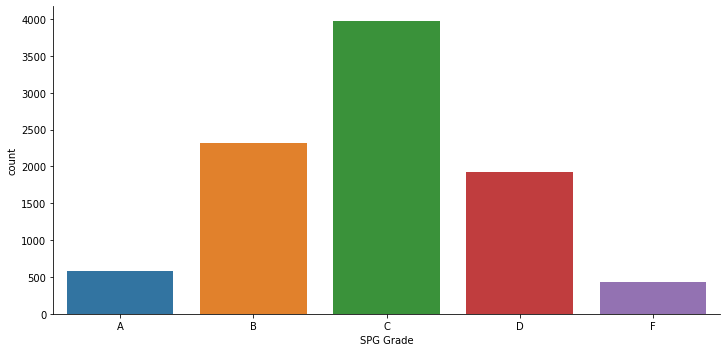

In [17]:
#Factor Plot for SPG Grade
s.columns=['SPG Grade']
                        
sns.factorplot("SPG Grade", data=s, aspect=2,
                       kind="count", order=['A','B','C','D','F'])

plt.show()

To solve this problem, we are using the crieteria below.

#### Test 3 types of sampler: UnderSample all cases, UnderSample majority class, SMOTE Oversample

Below we conduct 3 seperate procedures to produce 3 seperate sets of X and y from the original dataset. Those sets will be evaluate against each other and we will decide the best data balancing strategy to use.

In [18]:
# Check the dimension for X and y
schoolData_pick_new.shape
schoolData_SPG_new.shape

(9216, 50)

(9216,)

In [19]:
from imblearn.under_sampling import RandomUnderSampler

# Undersample the dataset using the RandomUnderSampler 
# Set all class sizes equal to the smallest class.
us = RandomUnderSampler()
X_us, y_us = us.fit_sample(schoolData_pick_new, pd.DataFrame(schoolData_SPG_new))

# Plot the new class distributions for y using the same funnction as above. 
#plot_class_dist(y_us)

In [20]:
from imblearn.under_sampling import RandomUnderSampler

# Undersample the dataset using the RandomUnderSampler 
# Undersample the majority class only
us = RandomUnderSampler(sampling_strategy='majority')
X_us_maj, y_us_maj = us.fit_sample(schoolData_pick_new, pd.DataFrame(schoolData_SPG_new))

# Plot the new class distributions for y using the same funnction as above. 
#plot_class_dist(y_us_maj)

In [21]:
from imblearn.over_sampling import SMOTE

# Oversample using SMOTE
# Make all classes the same size as the majority class.
# WARNING - This can exponentially increase the size of the input dataset.
sm = SMOTE(sampling_strategy='not majority')
X_sm, y_sm = sm.fit_sample(schoolData_pick_new, pd.DataFrame(schoolData_SPG_new))

# Plot the new class distributions for y using the same funnction as above. 
#plot_class_dist(y_sm)

By comparing the results for the 3 different methods dealing with data imbalance, we run random forest with the datasets we generated. Accuracy are measured with the results of the variables. As shown the SMOTE strategy get the highest accuracy. It will be used for the later SVM and Logistic regression fitting.

In [22]:
#Training using Undersample Method1 
for train_indices, test_indices in cv_object.split(X_us,y_us): 

    X_train = X_us.values[train_indices]
    y_train = y_us.values[train_indices]
    
    X_test = X_us.values[test_indices]
    y_test = y_us.values[test_indices]
    

clfus=RandomForestClassifier(n_estimators=100)
clfus.fit(X_train,y_train)
y_pred_us=clfus.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_us))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy: 0.6651162790697674


In [23]:
#Training using Undersample Method2
for train_indices, test_indices in cv_object.split(X_us_maj,y_us_maj): 

    X_train = X_us_maj.values[train_indices]
    y_train = y_us_maj.values[train_indices]
    
    X_test = X_us_maj.values[test_indices]
    y_test = y_us_maj.values[test_indices]
    
clfusm=RandomForestClassifier(n_estimators=100)
clfusm.fit(X_train,y_train)
y_pred_usm=clfusm.predict(X_test)
    
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_usm))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy: 0.788546255506608


In [24]:
#Training using Oversample Method
for train_indices, test_indices in cv_object.split(X_sm,y_sm): 

    X_train = X_sm.values[train_indices]
    y_train = y_sm.values[train_indices]
    
    X_test = X_sm.values[test_indices]
    y_test = y_sm.values[test_indices]

clfsm=RandomForestClassifier(n_estimators=100)
clfsm.fit(X_train,y_train)
y_pred_sm=clfsm.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_sm))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy: 0.876919204631261


In [5]:
schoolData.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9731 entries, 0 to 9730
Data columns (total 248 columns):
szip_ad                                float64
category_cd                            object
calendar_type_txt                      object
sna_pgm_type_cd                        object
school_type_txt                        object
calendar_only_txt                      object
title1_type_cd                         object
esea_status                            object
student_num                            float64
lea_avg_student_num                    float64
st_avg_student_num                     float64
Grad_project_status                    object
Math I_Size                            float64
lea_total_expense_num                  float64
lea_salary_expense_pct                 float64
lea_services_expense_pct               float64
lea_supplies_expense_pct               float64
lea_instruct_equip_exp_pct             float64
lea_federal_perpupil_num               float64
lea_loc

In [25]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.1, 10, 100], 'penalty': ['l1','l2'], 'solver': ['liblinear', 'lbfgs']}

grid = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=0.1, penalty=l1, solver=liblinear .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............. C=0.1, penalty=l1, solver=liblinear, total=   7.5s
[CV] C=0.1, penalty=l1, solver=liblinear .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.4s remaining:    0.0s


[CV] .............. C=0.1, penalty=l1, solver=liblinear, total=   7.6s
[CV] C=0.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.1, penalty=l1, solver=liblinear, total=   6.9s
[CV] C=0.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.1, penalty=l1, solver=liblinear, total=   7.3s
[CV] C=0.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.1, penalty=l1, solver=liblinear, total=   7.1s
[CV] C=0.1, penalty=l1, solver=lbfgs .................................
[CV] .................. C=0.1, penalty=l1, solver=lbfgs, total=   0.0s
[CV] C=0.1, penalty=l1, solver=lbfgs .................................
[CV] .................. C=0.1, penalty=l1, solver=lbfgs, total=   0.0s
[CV] C=0.1, penalty=l1, solver=lbfgs .................................
[CV] .................. C=0.1, penalty=l1, solver=lbfgs, total=   0.0s
[CV] C=0.1, penalty=l1, solver=lbfgs .................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  9.5min finished


Wall time: 10min 10s


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [26]:
print(grid.best_params_)

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


Below we will go through 4 different sessions: Create Model, Model Evaluation, Feature Importance an Support Vector Interpretation. The below picture can be used as an model index reference of all models we are fitting with two methodologies. 

<img align="center" src="https://github.com/fredpoon/ds_7331_jyrf_eda/blob/master/Model_List_2.jpg?raw=true" alt="Model List" />

## Modeling

### Logistic Regression
Within statistics there are many ways to fit a model. For the purpose of this project and the dataset we generated a Logistic Regression to best explain SPG Grade. Logistic regression is used to measure probability on a binary or class response variable, like true/false or yes/no. Because the dependent variable is binary this is one of the main differences in logistic regression and linear regression. The dependent variable in our dataset is multinomial meaning there are more than two possible outcomes. Our model is using SPG Grade as the dependent variable with four different possible outcomes, A-F.

First, let's split the dataset to train/test, and create 3 models. 
- Model with Original dataset
- Model with SMOTE dataset
- Model with optimally tuned parameters using GridSearchCV

In [27]:
# Split X and Y into Training and Testing dataset
for train_indices_org, test_indices_org in cv_object.split(schoolData_pick_new,schoolData_SPG_new): 

    Xsel_train = schoolData_pick_new.values[train_indices_org]
    ysel_train = schoolData_SPG_new[train_indices_org]
    
    Xsel_test = schoolData_pick_new.values[test_indices_org]
    ysel_test = schoolData_SPG_new[test_indices_org]

In [32]:
%%time
#  Logistic regression fit with the original dataset
from sklearn.metrics import accuracy_score
lr_model_org = LogisticRegression()

lr_model_org.fit(Xsel_train, ysel_train)
pred_org = lr_model_org.predict(Xsel_test)

accuracy_score(ysel_test, pred_org)

Wall time: 818 ms


0.4793926247288503

In [33]:
%%time
#  Logistic regression fit with the SMOTE dataset
lr_model = LogisticRegression()

lr_model.fit(X_train, y_train)
pred = lr_model.predict(X_test)

accuracy_score(y_test, pred)

Wall time: 2.06 s


0.47143216712811475

In [34]:
%%time
#Lasso
#Using the grid search parameters
model2 = LogisticRegression(C=100, penalty='l1', solver='liblinear')

model2.fit(X_train, y_train)
pred = model2.predict(X_test)

accuracy_score(y_test, pred)

Wall time: 41.8 s


0.6556758117291719

As we can see in our models above, our accuracy score of the model trained on the original data is comparatively low. Our model trained on SMOTE data did not do any better. It was not until we ran our GridSearchCV to find the optimal parameters which increased our accuracy score by 20 percentage points. 

[[  0  65  65   0   0]
 [  1 124 330   5   2]
 [  1  79 661  44   9]
 [  0  12 264  94   6]
 [  0   0  36  41   5]]


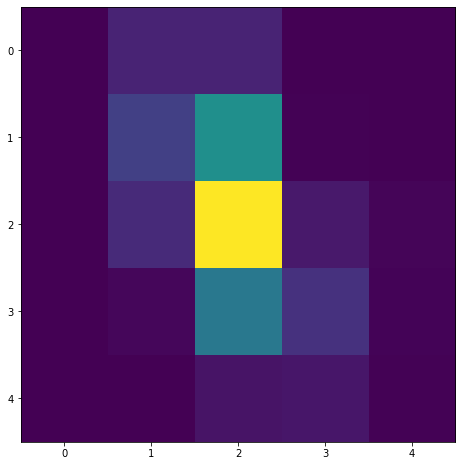

In [37]:
from sklearn import metrics as mt
# Confusion Matrix from model using original data
conf = mt.confusion_matrix(ysel_test,pred_org)

print(conf )

f = plt.figure(figsize=(8,8))
plt.imshow(conf)

[[666 108   9   5   0]
 [126 434 191  24   1]
 [ 16 195 396 192  21]
 [  1  20 175 413 185]
 [  0   1   6  92 696]]


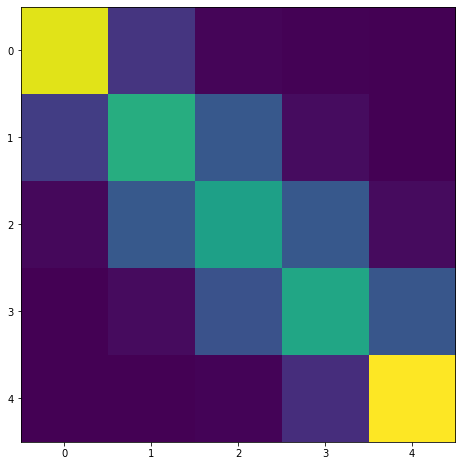

In [38]:
# Confusion Matrix from final model

conf = mt.confusion_matrix(y_test,pred)

print(conf )

f = plt.figure(figsize=(8,8))
plt.imshow(conf)

### Support Vector Machine (SVM)
SVM is a learning model used for classification and regression analysis.  It targets in finding hyperplanes in an N-dimensional space that can distinctly classifies the data points.

First, let's split the dataset to train/test. We'll use similar comparative strategy as we did in Logistic Regression:
- SVM model on original dataset
- SVM model on SMOTE dataset
- SVM model on optimally tuned parameters using GridSearchCV

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

scl_obj = StandardScaler()

Xorg_train_scaled = scl_obj.fit_transform(Xsel_train) # apply to training
Xorg_test_scaled = scl_obj.fit_transform(Xsel_test) 

In [40]:
%%time
# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn.svm import SVC
from sklearn import metrics as mt

# train the model just as before
svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') # get object
svm_clf.fit(Xorg_train_scaled, ysel_train)  # train object

y_hat = svm_clf.predict(Xorg_test_scaled) # get test set precitions

acc = mt.accuracy_score(ysel_test,y_hat)
conf = mt.confusion_matrix(ysel_test,y_hat)
print('accuracy:', acc )
print(conf)

accuracy: 0.6572668112798264
[[ 64  64   1   1   0]
 [ 13 262 183   4   0]
 [  1  75 637  80   1]
 [  0   0 131 241   4]
 [  0   0   4  70   8]]
Wall time: 9.49 s


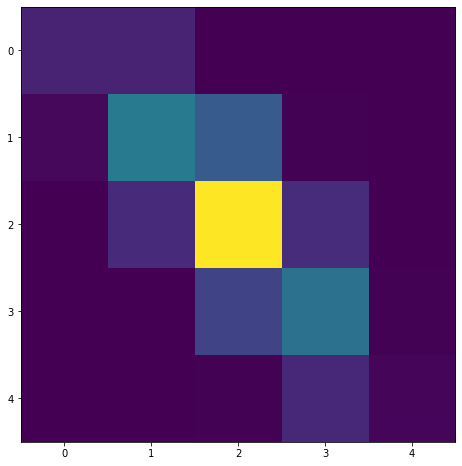

In [41]:
f = plt.figure(figsize=(8,8))
plt.imshow(conf)

The accuracy for the above model is below 70%. However the confusion matrix shows that because the data is imbalance, the accuracy across different class are a lot different from each other. For example, the accuracy rate of C is much higher than other class. 

To solve data imbalance problem we are using the SMOTE balanced dataset for SVM work as shown below:

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

scl_obj = StandardScaler()

Xs2_train_scaled = scl_obj.fit_transform(X_train) # apply to training
Xs2_test_scaled = scl_obj.fit_transform(X_test) 

In [43]:
%%time
# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn.svm import SVC
from sklearn import metrics as mt

# train the model just as before
svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') # get object
svm_clf.fit(Xs2_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(Xs2_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

accuracy: 0.7938585451799648
[[742  46   0   0   0]
 [ 77 577 105  16   1]
 [  6 164 497 145   8]
 [  0   4 124 590  76]
 [  0   0   3  44 748]]
Wall time: 32.9 s


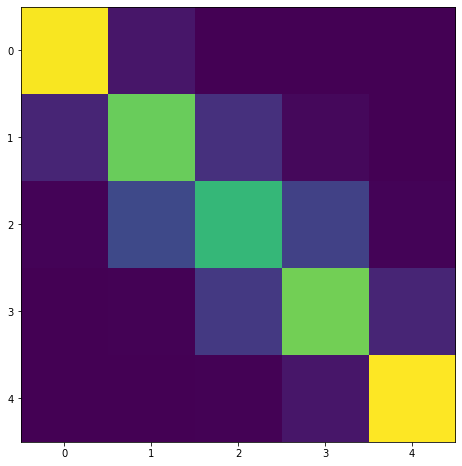

In [44]:
f = plt.figure(figsize=(8,8))
plt.imshow(conf)

As shown in the above confusion matrix and plot, we don't see that class C has an uniquely high accuracy compared to other classes anymore. Instead, we see that the accuracies are distributed much even across different classes.

The accuracy of the model has also raised significantly from previous model.

In [45]:
# look at the support vectors
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

(11002, 50)
(11002,)
[1253 2665 2931 2700 1453]


In order to further optimize our model, we are conducting a grid search for SVM parameters. By running the grid searching below we choose the best parameter sets for SVM: C=10, kernel='rbf',gamma=0.1

Just notice that the below run takes a longer time (~20min).

In [48]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 
             'kernel': ['rbf', 'sigmoid']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(Xs2_train_scaled, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=  29.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.2s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=  29.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=  27.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=  27.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=  27.5s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=  12.7s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=  12.8s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=  12.9s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed: 40.5min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=2)

In [49]:
print(grid.best_params_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [46]:
svm_clf_gs = SVC(C=10, kernel='rbf', degree=3, gamma=0.1) # get object
svm_clf_gs.fit(Xorg_train_scaled, ysel_train)  # train object

y_hat_gs = svm_clf_gs.predict(Xs2_test_scaled) # get test set precitions

#grid_predictions = grid.predict(Xs2_test_scaled)
#acc = mt.accuracy_score(y_test, grid_predictions)
acc = mt.accuracy_score(y_test, y_hat_gs)

print(acc)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

0.8567832871885225


As we can see in our models above, our accuracy score of the model trained on the original data is comparatively low. Our model trained on SMOTE data did better and get 14 percentage points uplift for accuracy. It was not until we ran our GridSearchCV to find the optimal parameters which increased our accuracy score approximately 10 percentage points. 

## Model Advantages

In regards to time, our dataset was not very large. Our models all ran within 30 seconds. Because of this we did not run Stochastic Gradient Descent (SGD). When rendering this notebook, GridSearchCV took up to 10 minutes to run for Logistic Regression and up to 20 minutes for SVM. But once we found the optimal parameters, we did not have to re-run the search.

Overall, SVM produce higher accuracy results at approximately 85 percentage points with our optimal parameters returned from the grid search. The best accuracy percentage we were able to produce with Logistic Regression was just under 67 percentage points. Looking at our confusion matrix, we can see that Logistic Regression has a harder time distinguishing between SPG grades. One advantage of SVM is using nonlinear kernals, this may add model complexity which can raise the accuracy.

If we use original data, we see unbalanced data where SPG Grade favors 'C'. In the confusion matrix plot, we see a discrepancy along the diagonal between 'C' and the other response categories. To counter this, we used <code>imbalanced-learn</code> package and SMOTE to balance our data. With the SMOTE dataset, our confusion matrix plot was more evenly distributed.

Despite Logistic Regression losing out in accuracy score, it still has its advantages. Logistic Regression assisted with feature selection in that it allowed us to measure feature importance. In terms of speed, Logistic Regression ran much faster than SVM. With a larger dataset, LR models may still be advantageous from this perspective.

## Interpret Feature Importance 

In [47]:
from sklearn.preprocessing import StandardScaler

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
model2 = LogisticRegression(C=100, penalty='l1', solver='liblinear')
model2.fit(X_train_scaled, y_train)
pred = model2.predict(X_test_scaled)

acc = mt.accuracy_score(y_test,pred)
conf = mt.confusion_matrix(y_test,pred)
print('accuracy:', acc )
print(conf )

weights = model2.coef_.T # take transpose to make a column vector
variable_names = schoolData_pick_new.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])

StandardScaler(copy=True, with_mean=True, with_std=True)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

accuracy: 0.6589478983136169
[[668 104  11   5   0]
 [129 435 189  23   0]
 [ 19 193 402 184  22]
 [  2  19 171 418 184]
 [  0   1   6  93 695]]
TotalTargets_pTarget_PctMet has weight of 1.2609978455676363
MinorityMalePct has weight of -1.645724834627868
MinorityFemalePct has weight of 0.9094789951013704
short_susp_per_c_num has weight of -3.4970099072323
avg_daily_attend_pct has weight of 0.8145213139040627
title1_type_cd_Y has weight of -0.6797807409112365
BlackMalePct has weight of -0.6158699410642828
AsianFemalePct has weight of 0.25043275543010163
BlackFemalePct has weight of -0.5188850491038133
HispanicMalePct has weight of -1.3576229568951577
MathGr3-8_pTarget_PctMet has weight of 0.29804255403138796
AsianMalePct has weight of 0.46158223642224366
SciGr5&8_pTarget_PctMet has weight of -0.9196166089946315
nbpts_num has weight of 0.11478341754877666
lea_sat_avg_score_num has weight of 0.3647218472703562
stud_internet_comp_num has weight of -0.11305325251234172
st_avg_student_num ha

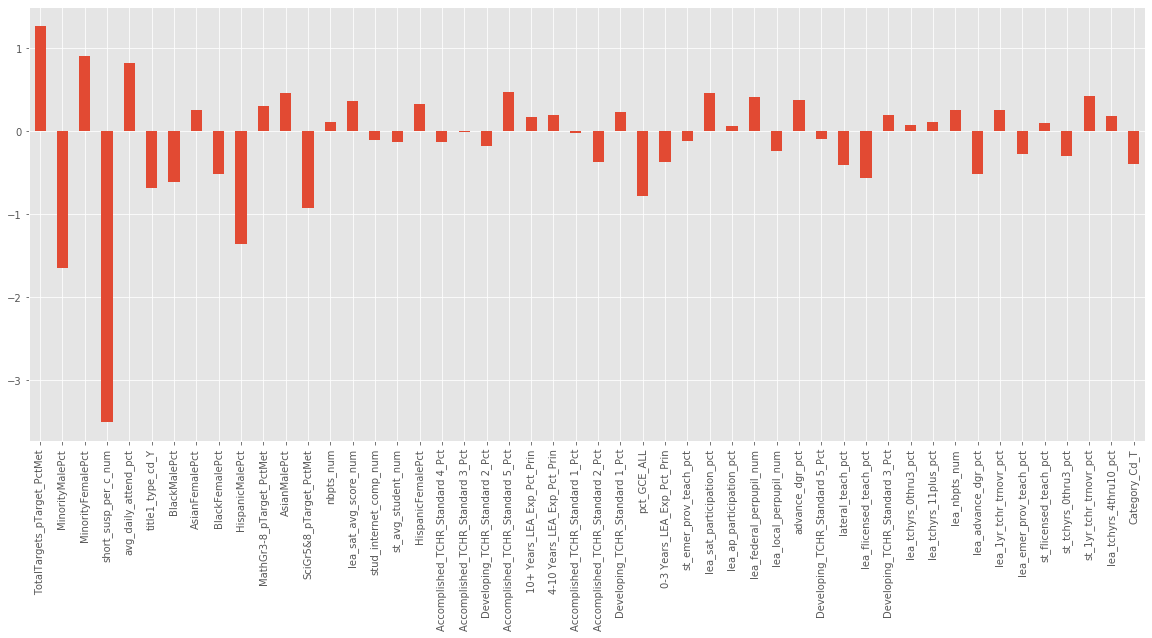

In [48]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

weights = pd.Series(model2.coef_[0],index=schoolData_pick_new.columns)
weights.plot(kind='bar',figsize=(20,8))
plt.show()

The weights in Logistic Regressions makes the model more interpretable. To make the weights of all features comparable, we have to normalize the attributes to the same scales. 

From the plot above we can recognize some important features:
- short_susp_per_c_num
- MinorityMalePct
- HispanicMalePct
- TotalTargets_pTarget_PctMet
- SciGr5&8_pTarget_PctMet

The polarities of the weights can also be interpreted as positively or negatively impact the SPG Grade.

In [49]:
%%time
#Use the linear kernel to get the set of coefficients for SVM
svm = SVC(kernel='linear') 
svm.fit(Xs2_train_scaled, y_train) 
y_hat = svm.predict(Xs2_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
print('accuracy:', acc ) #Check the accuracy to make sure the model is still good
svm.coef_.shape

accuracy: 0.704757110495847
Wall time: 51 s


(10, 50)

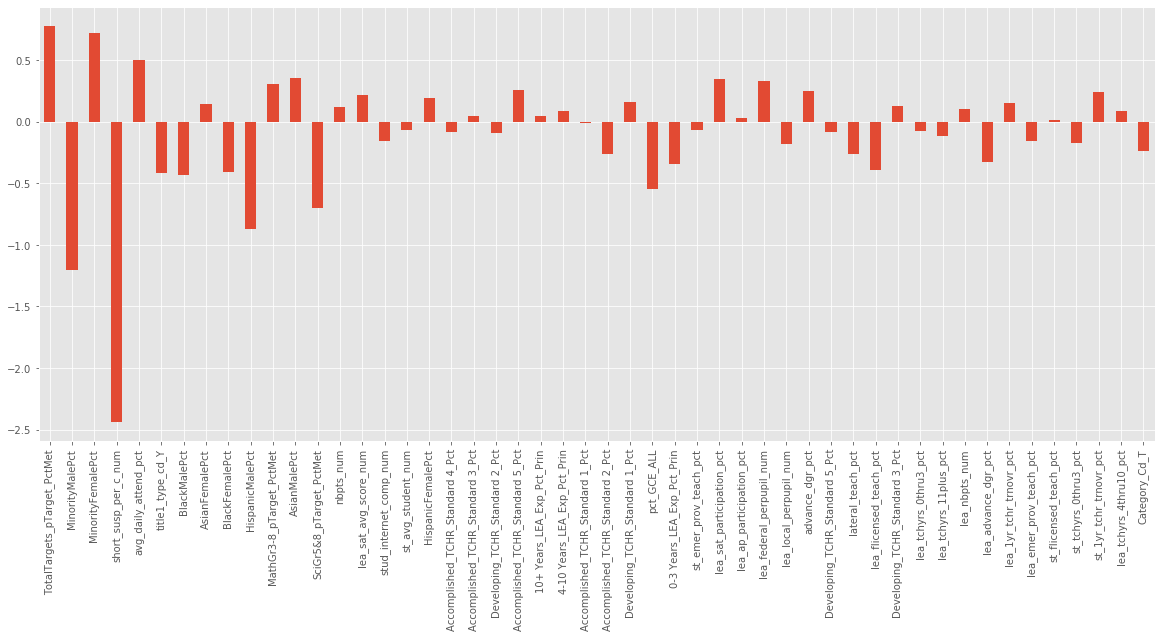

In [50]:
#Plot out the weights from the svm_coef for feature importance interpretation.
weights = pd.Series(svm.coef_[0],index=schoolData_pick_new.columns)
weights.plot(kind='bar',figsize=(20,8))
plt.show()

Unlike Logistic regression, SVM do not have a direct model weight but if we use linear kernel for SVM, it's possible that we get a hyperplane that separate the classes as best as possible.

Just for interpretation purpose, we can use the coefficients from the svm which represent the hyperplane. It gives you the coordinates of a vector which is orthogonal to the hyperplane. Check the plot below for recoginizing the parameters with bigger weights.

From the plot above we can recognize some important features, for example:
- short_susp_per_c_num
- BlackMalePct
- HispanicMalePct
- pct_GCE_ALL
- lea_flicensed_teach_pct

The polarities of the weights can also be interpreted as positively or negatively impact the SPG Grade.

For example, the coefficient of short_susp_per_c_num is negative, which means it is negatively correlated with SPG Grade -- The higher the suspension rate, the lower the SPG Grade is. Similiar concepts are applied to other variables.

From the two methodologies, we recognize and consider the short_sups_per_c_num is the most important feature. Along this thought, we see that there are similarities between the two classification models and the attribute weights.

## Interpret Support Vectors

In [51]:
#Re-assign all colnames for SMOTE dataset
schoolData_sm = pd.DataFrame(X_sm)
schoolData_sm.columns=['TotalTargets_pTarget_PctMet',
'MinorityMalePct',
'MinorityFemalePct',
'short_susp_per_c_num',
'avg_daily_attend_pct',
'title1_type_cd_Y',
'BlackMalePct',
'AsianFemalePct',
'BlackFemalePct',
'HispanicMalePct',
'MathGr3-8_pTarget_PctMet',
'AsianMalePct',
'SciGr5&8_pTarget_PctMet',
'nbpts_num',
'lea_sat_avg_score_num',
'stud_internet_comp_num',
'st_avg_student_num',
'HispanicFemalePct',
'Accomplished_TCHR_Standard 4_Pct',
'Accomplished_TCHR_Standard 3_Pct',
'Developing_TCHR_Standard 2_Pct',
'Accomplished_TCHR_Standard 5_Pct',
'10+ Years_LEA_Exp_Pct_Prin',
'4-10 Years_LEA_Exp_Pct_Prin',
'Accomplished_TCHR_Standard 1_Pct',
'Accomplished_TCHR_Standard 2_Pct',
'Developing_TCHR_Standard 1_Pct',
'pct_GCE_ALL',
'0-3 Years_LEA_Exp_Pct_Prin',
'st_emer_prov_teach_pct',
'lea_sat_participation_pct',
'lea_ap_participation_pct',
'lea_federal_perpupil_num',
'lea_local_perpupil_num',
'advance_dgr_pct',
'Developing_TCHR_Standard 5_Pct',
'lateral_teach_pct',
'lea_flicensed_teach_pct',
'Developing_TCHR_Standard 3_Pct',
'lea_tchyrs_0thru3_pct',
'lea_tchyrs_11plus_pct',
'lea_nbpts_num',
'lea_advance_dgr_pct',
'lea_1yr_tchr_trnovr_pct',
'lea_emer_prov_teach_pct',
'st_flicensed_teach_pct',
'st_tchyrs_0thru3_pct',
'st_1yr_tchr_trnovr_pct',
'lea_tchyrs_4thru10_pct',
'Category_Cd_T',
]

In [52]:
df_tested_on = schoolData_sm.iloc[train_indices] # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf.support_,:]

df_support['SPG Grade'] = y_sm.values[svm_clf.support_] # add back in the 'Survived' Column to the pandas dataframe
#X_sub['SPG Grade'] = y # also add it back in for the original data
schoolData_sm['SPG Grade'] = y_sm # also add it back in for the original 
df_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11002 entries, 10846 to 17380
Data columns (total 51 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   TotalTargets_pTarget_PctMet       11002 non-null  float64
 1   MinorityMalePct                   11002 non-null  float64
 2   MinorityFemalePct                 11002 non-null  float64
 3   short_susp_per_c_num              11002 non-null  float64
 4   avg_daily_attend_pct              11002 non-null  float64
 5   title1_type_cd_Y                  11002 non-null  uint8  
 6   BlackMalePct                      11002 non-null  float64
 7   AsianFemalePct                    11002 non-null  float64
 8   BlackFemalePct                    11002 non-null  float64
 9   HispanicMalePct                   11002 non-null  float64
 10  MathGr3-8_pTarget_PctMet          11002 non-null  float64
 11  AsianMalePct                      11002 non-null  float64
 12  

<Figure size 720x288 with 0 Axes>

Text(0.5, 1.0, 'st_tchyrs_0thru3_pct (Instances chosen as Support Vectors)')

Text(0.5, 1.0, 'st_tchyrs_0thru3_pct (Original)')

<Figure size 720x288 with 0 Axes>

Text(0.5, 1.0, 'avg_daily_attend_pct (Instances chosen as Support Vectors)')

Text(0.5, 1.0, 'avg_daily_attend_pct (Original)')

<Figure size 720x288 with 0 Axes>

Text(0.5, 1.0, 'short_susp_per_c_num (Instances chosen as Support Vectors)')

Text(0.5, 1.0, 'short_susp_per_c_num (Original)')

<Figure size 720x288 with 0 Axes>

Text(0.5, 1.0, 'MinorityFemalePct (Instances chosen as Support Vectors)')

Text(0.5, 1.0, 'MinorityFemalePct (Original)')

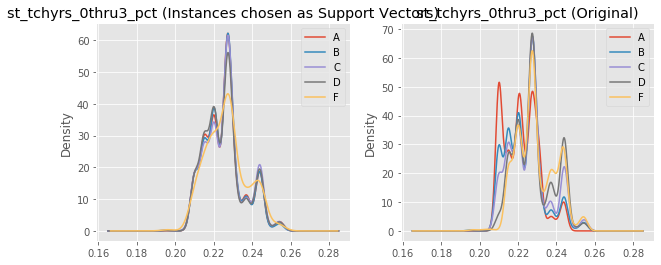

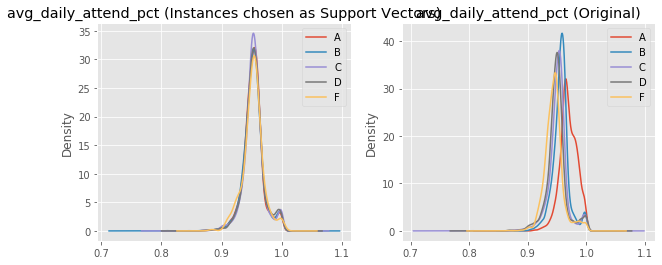

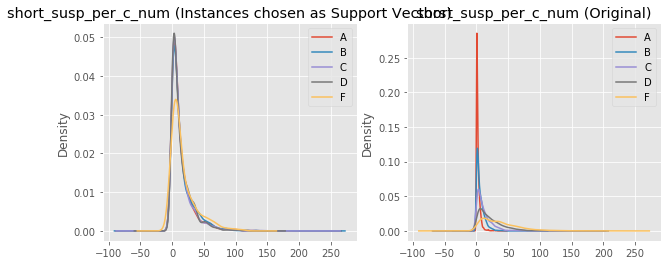

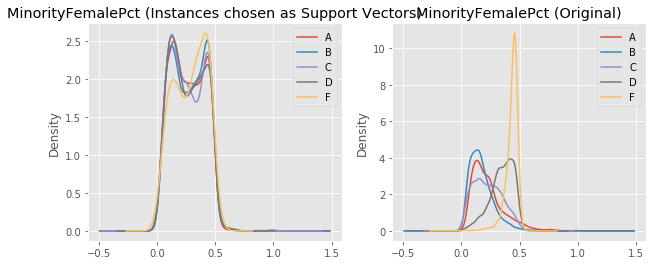

In [53]:
# now lets see the statistics of these attributes
#from pandas.tools.plotting import boxplot
from pandas.plotting import boxplot
from matplotlib import pyplot as plt

# group the original data and the support vectors
df_grouped_support = df_support.groupby(['SPG Grade'])
#df_grouped = X_sub.groupby(['SPG Grade'])
df_grouped = schoolData_sm.groupby(['SPG Grade'])

# plot KDE of Different variables
###########This is a random selection NOW
vars_to_plot = ['st_tchyrs_0thru3_pct','avg_daily_attend_pct','short_susp_per_c_num','MinorityFemalePct']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['A','B','C','D','F'])
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['A','B','C','D','F'])
    plt.title(v+' (Original)')

The above analysis telling us how is the look for the original statsitics and how is the look for the statistics of the support vectors. The four variables 'st_tchyrs_0thru3_pct','avg_daily_attend_pct','short_susp_per_c_num','MinorityFemalePct' are plotted above. But you can also plot out the other 46 variables for comparison.

What we can observe is that the seperation of class-based distribution is apparantly not as large as the original data for all 4 different variables. We can explain that by the principle of support vector composition, which tend to be the instances of either the edge of class or incorrectly classified data.

<Figure size 720x288 with 0 Axes>

Text(0.5, 0, 'st_tchyrs_0thru3_pct')

Text(0, 0.5, 'avg_daily_attend_pct')

Text(0.5, 1.0, '(Support Vectors)')

Text(0.5, 0, 'st_tchyrs_0thru3_pct')

Text(0, 0.5, 'avg_daily_attend_pct')

Text(0.5, 1.0, '(Original)')

<Figure size 720x288 with 0 Axes>

Text(0.5, 0, 'short_susp_per_c_num')

Text(0, 0.5, 'MinorityFemalePct')

Text(0.5, 1.0, '(Support Vectors)')

Text(0.5, 0, 'short_susp_per_c_num')

Text(0, 0.5, 'MinorityFemalePct')

Text(0.5, 1.0, '(Original)')

<Figure size 720x288 with 0 Axes>

Text(0.5, 0, 'short_susp_per_c_num')

Text(0, 0.5, 'MinorityMalePct')

Text(0.5, 1.0, '(Support Vectors)')

Text(0.5, 0, 'short_susp_per_c_num')

Text(0, 0.5, 'MinorityMalePct')

Text(0.5, 1.0, '(Original)')

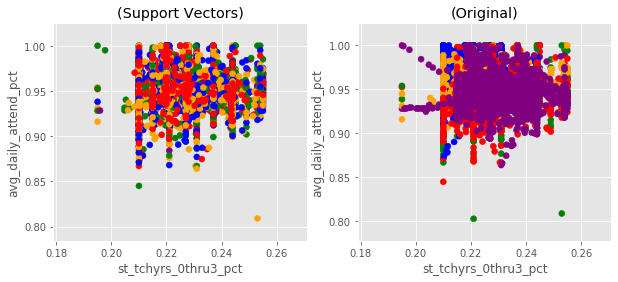

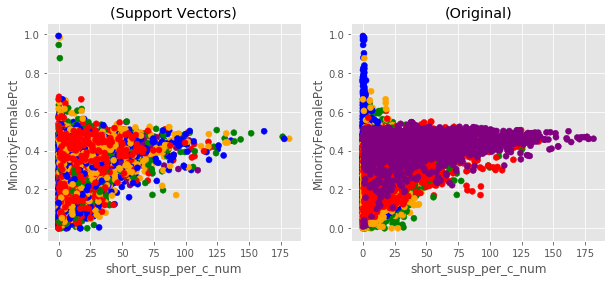

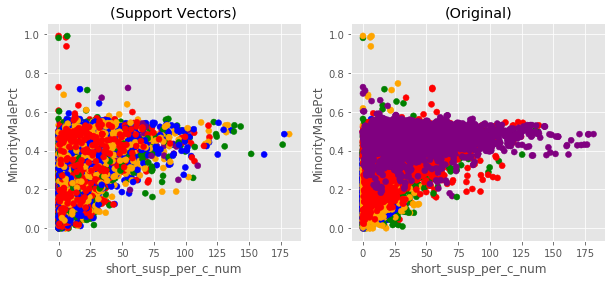

In [54]:
vars_to_plot_1 = ['st_tchyrs_0thru3_pct', 'short_susp_per_c_num', 'short_susp_per_c_num']
vars_to_plot_2 = ['avg_daily_attend_pct','MinorityFemalePct', 'MinorityMalePct']
df_support['SPG Color'] = np.select(
    [
        df_support['SPG Grade'] == 'A',
        df_support['SPG Grade'] == 'B',
        df_support['SPG Grade'] == 'C',
        df_support['SPG Grade'] == 'D',
        df_support['SPG Grade'] == 'F'
    ],
    [
        'blue',
        'orange',
        'green',
        'red',
        'purple'
    ],
    default='NA'
)
schoolData_sm['SPG Color'] = np.select(
    [
        schoolData_sm['SPG Grade'] == 'A',
        schoolData_sm['SPG Grade'] == 'B',
        schoolData_sm['SPG Grade'] == 'C',
        schoolData_sm['SPG Grade'] == 'D',
        schoolData_sm['SPG Grade'] == 'F'
    ],
    [
        'blue',
        'orange',
        'green',
        'red',
        'purple'
    ],
    default='NA'
)
for v in zip(vars_to_plot_1, vars_to_plot_2):
    plt.figure(figsize=(10,4))
    # plot support vector joint relationships
    plt.subplot(1,2,1)
    plt.scatter(df_support[v[0]], df_support[v[1]], c = df_support['SPG Color'])
    plt.xlabel(v[0])
    plt.ylabel(v[1])
    plt.title('(Support Vectors)')
    # plot original joint relationships
    plt.subplot(1,2,2)
    plt.scatter(schoolData_sm[v[0]], schoolData_sm[v[1]], c = schoolData_sm['SPG Color'])
    plt.xlabel(v[0])
    plt.ylabel(v[1])
    plt.title('(Original)')

Above, we look at the joint plots of the data and see how relationships have changed. From the scatter plot, we can see that the support vectors have similar overlap among the different SPG Grades compared to the original dataset. There are fewer extreme values in the support vectors as well, when compared to the original dataset.